In [22]:
import pandas as pd
from this_mapping import supported_genres

In [23]:
interaction_data = pd.read_csv(
    '../interaction_data.csv'
)
data = pd.read_csv(
    '../edadata.csv'
)

In [24]:
# Убедись, что item_id в обоих датафреймах одного типа
interaction_data['item_id'] = interaction_data['item_id'].astype(int)
data['item_id'] = data['item_id'].astype(int)

# Объединяем
merged = interaction_data.merge(data[['item_id', 'genre']], on='item_id', how='left')

In [25]:
# Создаём обратный маппинг из supported_genres
idx_to_genre = {idx: genre for idx, genre in enumerate(supported_genres)}

# Декодируем числовой жанр в название
merged['genre_name'] = merged['genre'].map(idx_to_genre)

# Проверка на пропущенные значения (если genre был NaN или вне диапазона)
if merged['genre_name'].isna().any():
    bad_genres = merged.loc[merged['genre_name'].isna(), 'genre'].unique()
    raise ValueError(f"Обнаружены некорректные значения жанров: {bad_genres}")

# Количество взаимодействий по жанрам
genre_counts = merged['genre_name'].value_counts()
print(genre_counts)

genre_name
Pop            32967
Rap            26394
Rock           25191
Hip-Hop        22888
Indie          15803
R&B            14972
Folk           10813
Alternative     9712
Country         6864
Soul            6601
Blues           1895
Electronic      1502
Jazz            1277
Reggae          1117
Ska              394
Classical        259
Name: count, dtype: int64


C:\Users\mypc\AppData\Local\Temp\ipykernel_3336\3671373941.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


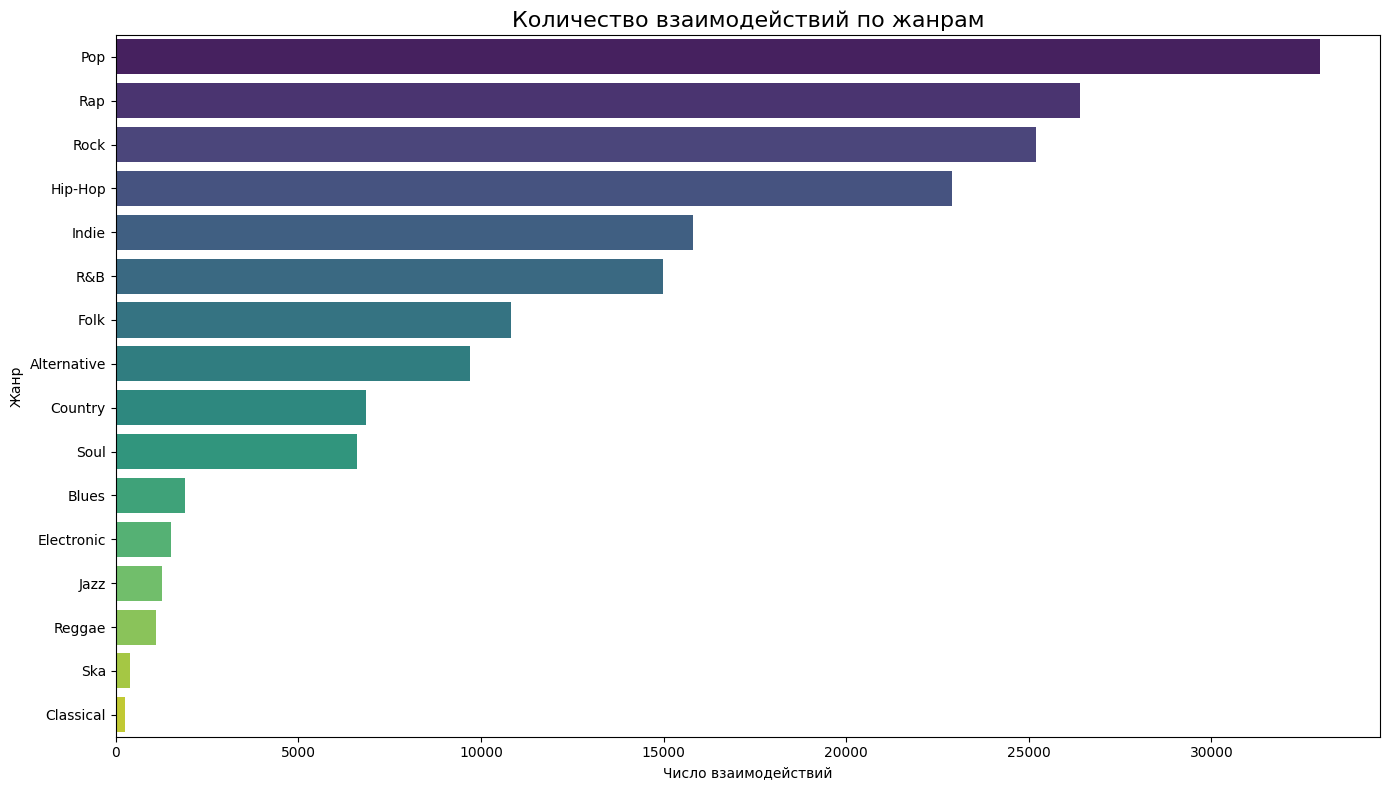

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, у тебя уже есть merged DataFrame с колонкой 'genre_name'
# Если нет — восстановим его быстро:

idx_to_genre = {i: g for i, g in enumerate(supported_genres)}

# Загружаем данные
interaction_data = pd.read_csv("../interaction_data.csv")
tracks_df = pd.read_csv("../edadata.csv")
tracks_df['genre_name'] = tracks_df['genre'].map(idx_to_genre)

# Объединяем
merged = interaction_data.merge(tracks_df[['item_id', 'genre_name']], on='item_id', how='left')

# Считаем взаимодействия по жанрам
genre_counts = merged['genre_name'].value_counts().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Количество взаимодействий по жанрам", fontsize=16)
plt.xlabel("Число взаимодействий")
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()

In [27]:
# Декодируем жанры
idx_to_genre = {i: g for i, g in enumerate(supported_genres)}
tracks_df['genre_name'] = tracks_df['genre'].map(idx_to_genre)

# Объединяем взаимодействия с жанрами
merged = interaction_data.merge(
    tracks_df[['item_id', 'genre_name']],
    on='item_id',
    how='left'
)

C:\Users\mypc\AppData\Local\Temp\ipykernel_3336\1367087879.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")


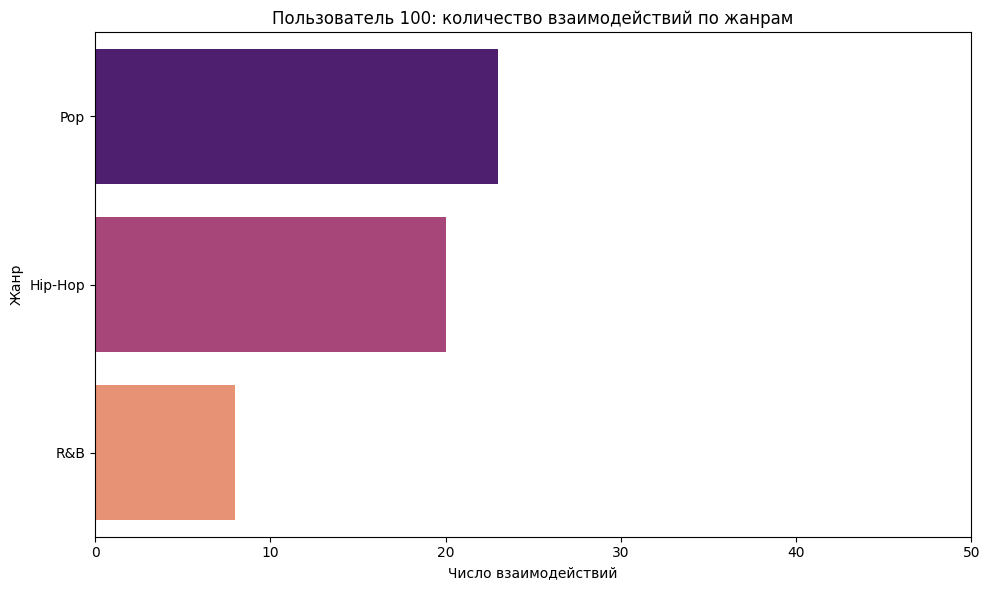

C:\Users\mypc\AppData\Local\Temp\ipykernel_3336\1367087879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rel.values, y=genre_avg_rel.index, palette="viridis")


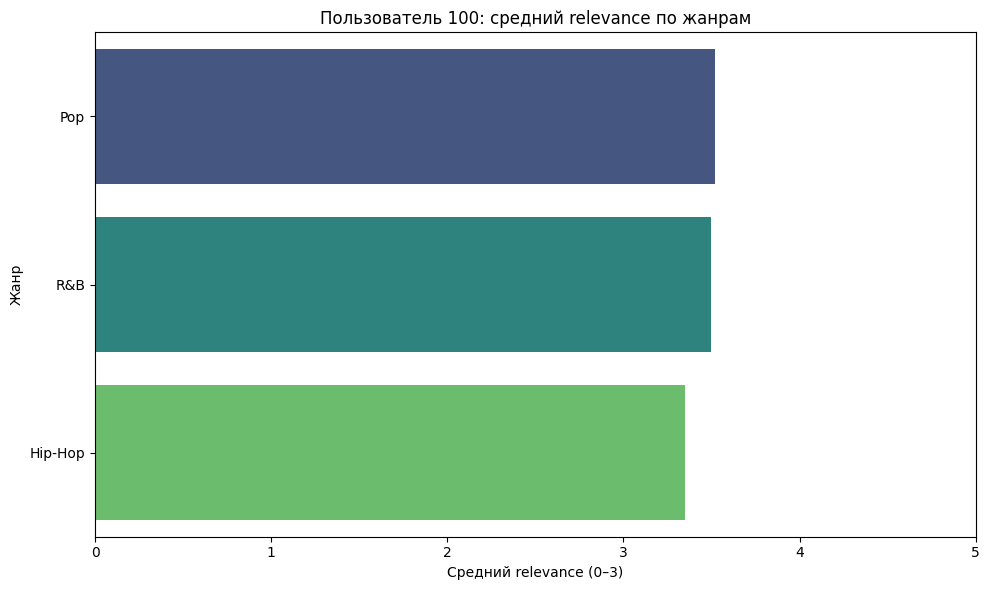

In [28]:
# Выбираем конкретного пользователя
user_id = 100
interaction_data = merged[merged['user_id'] == user_id]

if interaction_data.empty:
    raise ValueError(f"Пользователь {user_id} не найден!")

# === Вариант 1: Количество взаимодействий по жанрам ===
genre_counts = interaction_data['genre_name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title(f"Пользователь {user_id}: количество взаимодействий по жанрам")
plt.xlabel("Число взаимодействий")
plt.xlim(0, 50)
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()

# === Вариант 2: Средний relevance по жанрам (качество взаимодействия) ===
genre_avg_rel = interaction_data.groupby('genre_name')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_avg_rel.values, y=genre_avg_rel.index, palette="viridis")
plt.title(f"Пользователь {user_id}: средний relevance по жанрам")
plt.xlabel("Средний relevance (0–3)")
plt.ylabel("Жанр")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()